# Vegetable Price Prediction Using Machine Learning
Implemented for Agra district, Agra market (Commodity = Potato) 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [84]:
vegetables = pd.read_csv('Agra_Potato.csv')
vegetables.head()

Sl no. District Name Market Name Commodity Variety Grade  \
0       1          Agra        Agra    Potato    Desi   FAQ   
1       2          Agra        Agra    Potato    Desi   FAQ   
2       3          Agra        Agra    Potato    Desi   FAQ   
3       4          Agra        Agra    Potato    Desi   FAQ   
4       5          Agra        Agra    Potato    Desi   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     1380                     1550   
1                     1300                     1450   
2                     1400                     1550   
3                     1350                     1550   
4                     1350                     1550   

   Modal Price (Rs./Quintal) Price Date  
0                       1450  31-Dec-19  
1                       1380  30-Dec-19  
2                       1480  28-Dec-19  
3                       1450  27-Dec-19  
4                       1440  26-Dec-19

# Drop Unnecessary Colums
Sl no, Commodity, Grade are not  useful so drop it

In [85]:
vegetables = vegetables.drop(['Sl no.','Commodity','Grade'], axis = 1)

# Data Selection

select District Name == Agra <br>
Select Market Name == Agra <br>
Then Select Variety == Desi

In [86]:
vegetables = vegetables[vegetables['District Name'] == "Agra"]
vegetables = vegetables[vegetables['Market Name'] == "Agra"]
vegetables.head()

District Name Market Name Variety  Min Price (Rs./Quintal)  \
0          Agra        Agra    Desi                     1380   
1          Agra        Agra    Desi                     1300   
2          Agra        Agra    Desi                     1400   
3          Agra        Agra    Desi                     1350   
4          Agra        Agra    Desi                     1350   

   Max Price (Rs./Quintal)  Modal Price (Rs./Quintal) Price Date  
0                     1550                       1450  31-Dec-19  
1                     1450                       1380  30-Dec-19  
2                     1550                       1480  28-Dec-19  
3                     1550                       1450  27-Dec-19  
4                     1550                       1440  26-Dec-19

In [87]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
#vegetables['Price Date'] = vegetables['Price Date'].dt.day
#vegetables = vegetables.iloc[::-1]
#vegetables.tail(10)
date = vegetables['Price Date']
date = np.reshape(np.array(date), (len(date),1))
df = pd.DataFrame(data = date, columns = ['Price_Date'])
df = df.iloc[::-1]
df.reset_index(inplace=True)
df.drop(['index'], axis=1,inplace=True)
df.head(5)
df.to_csv("Agra_Potato_Date.csv")

# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [59]:
climate = pd.read_csv('climate_Agra_Potato.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)
print(list(X.columns))
df = pd.DataFrame(data = X, columns = list(X.columns))
df.to_csv('Agra_Potato_X.csv') 
df = pd.DataFrame(data = y, columns = list(y.columns))
df.to_csv('Agra_Potato_y.csv')
print(len(list(X.columns)))

   index District Name Market Name Variety  Min Price (Rs./Quintal)  \
0    286          Agra        Agra    Desi                      370   
1    285          Agra        Agra    Desi                      380   
2    284          Agra        Agra    Desi                      400   
3    283          Agra        Agra    Desi                      400   
4    282          Agra        Agra    Desi                      400   

   Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  Price Date   Temp_Max  \
0                      520                        460           2  86.176190   
1                      520                        450           3  85.990476   
2                      600                        500           4  85.828571   
3                      560                        480           5  85.661905   
4                      600                        500           7  85.319048   

    Temp_Avg  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  Humid_Min  \
0  78.703810  ..

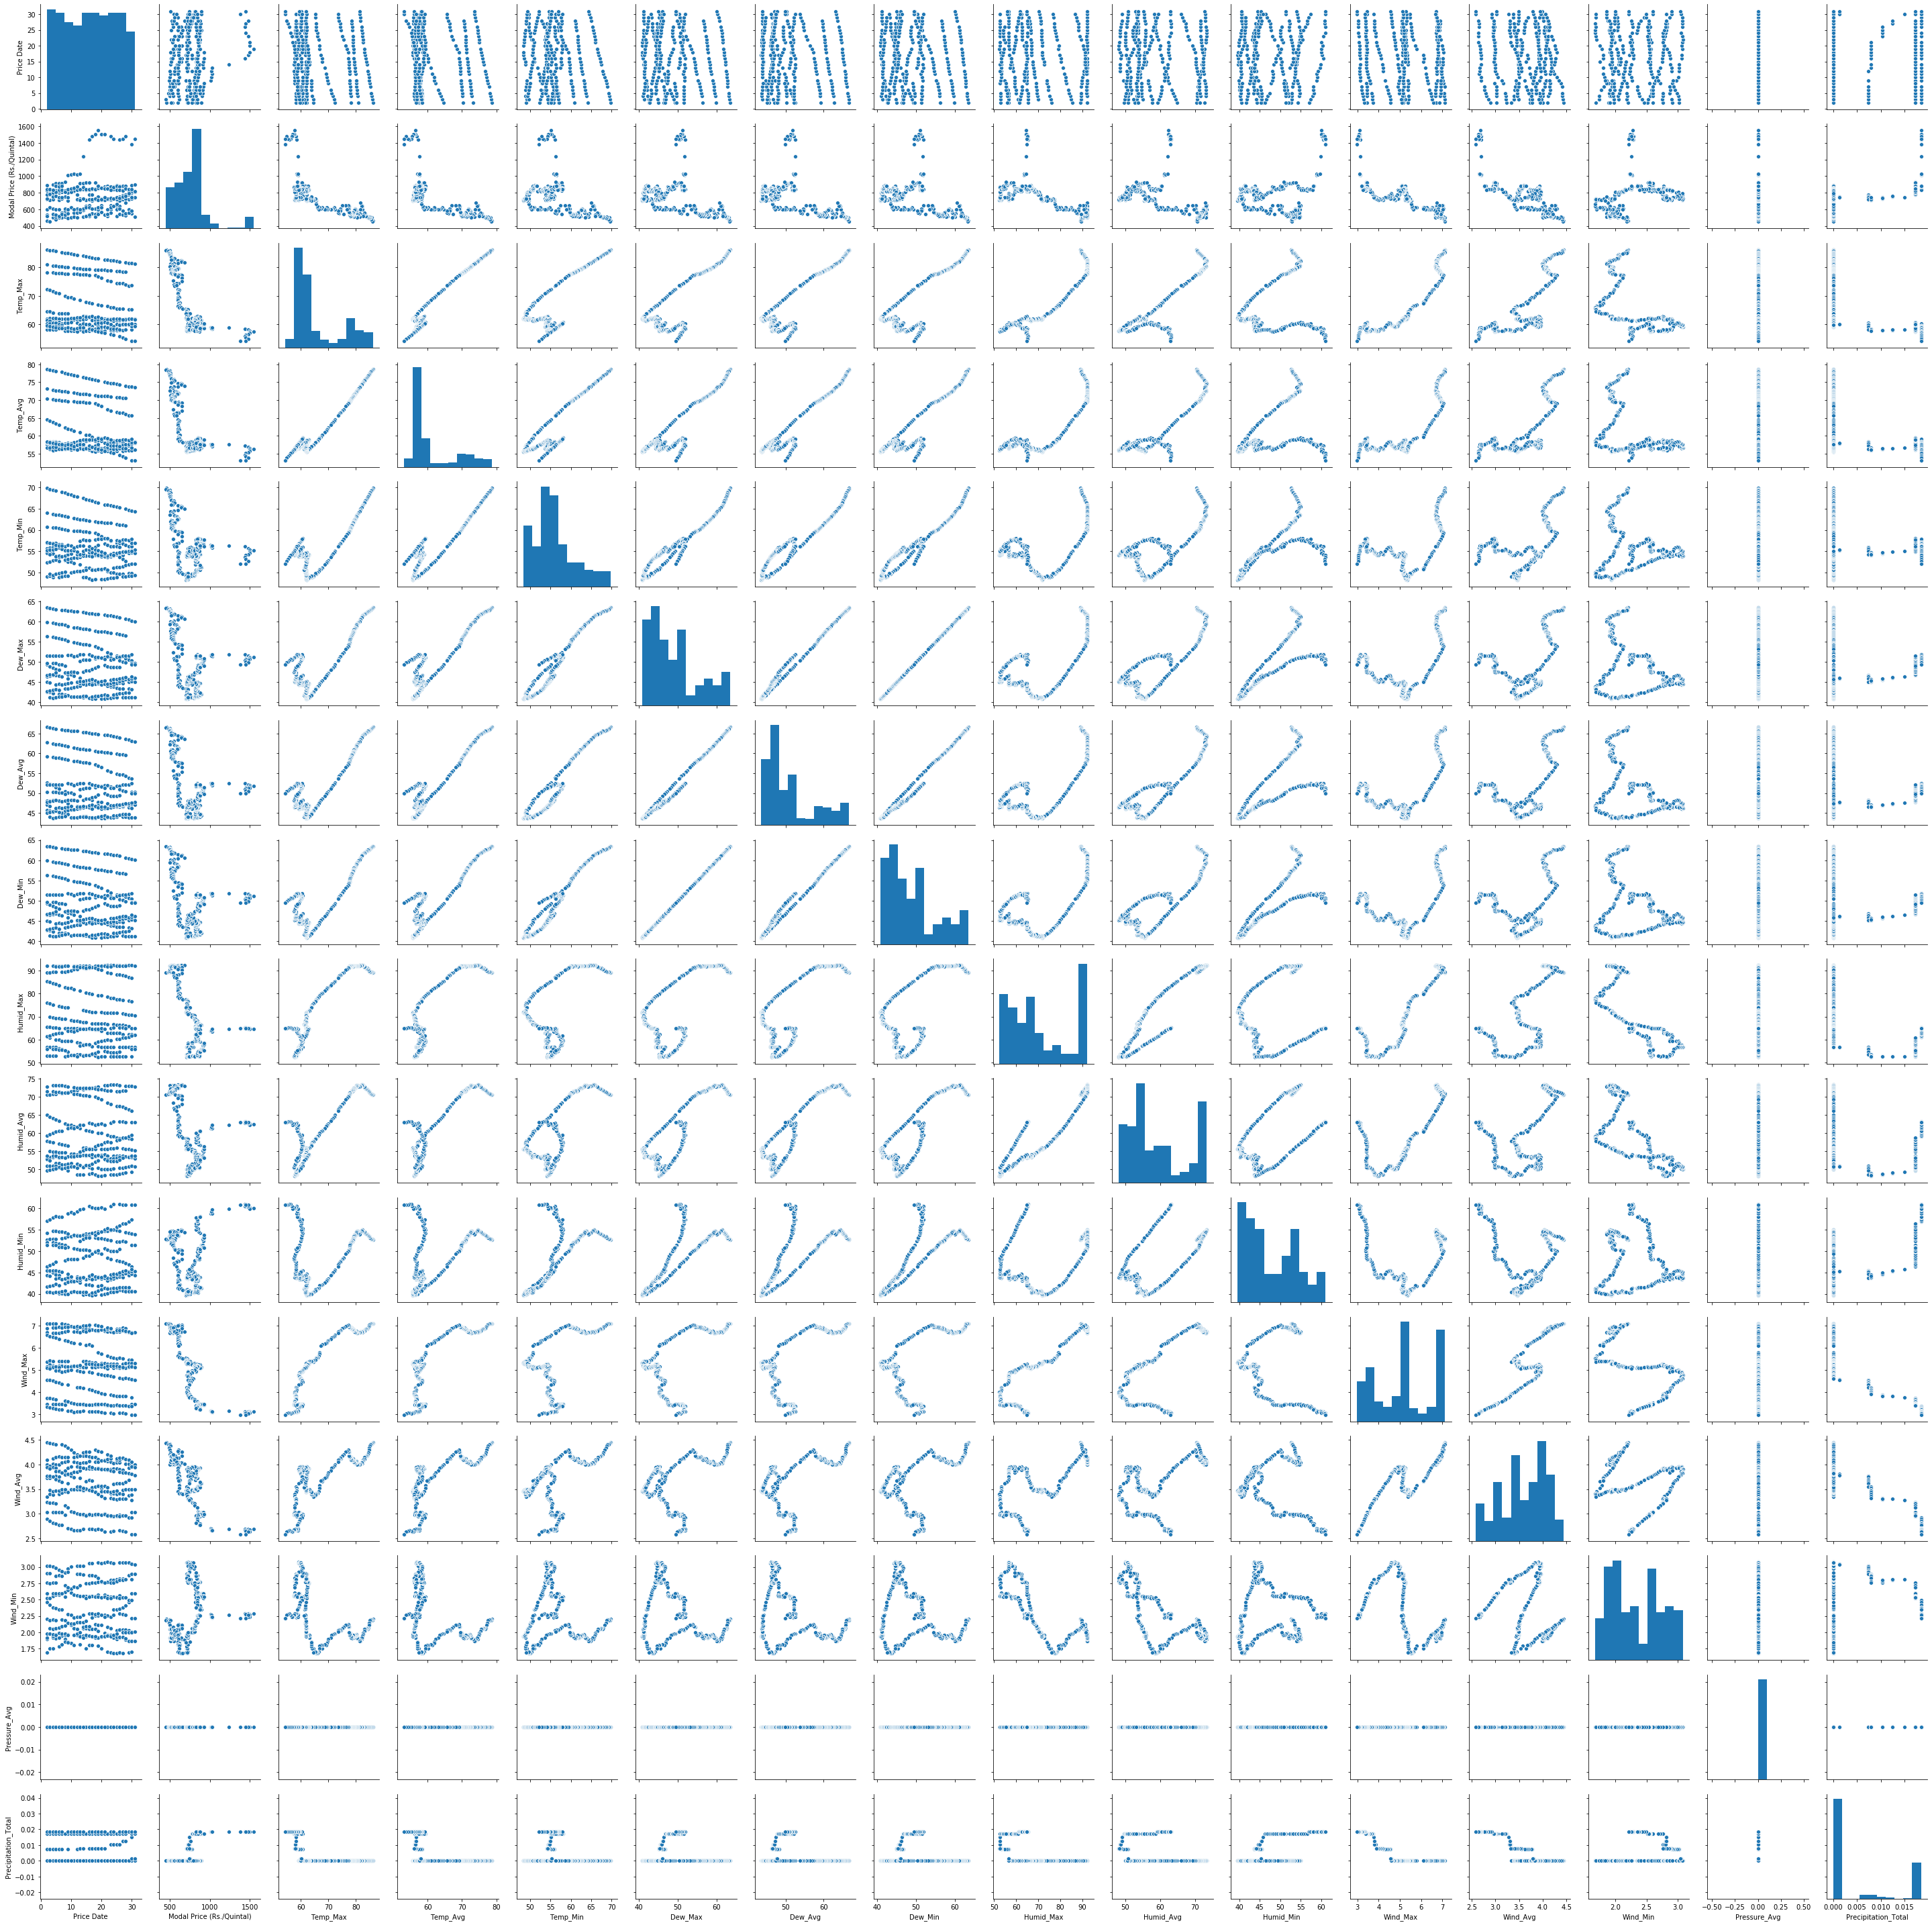

In [7]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [31]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 140,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.1529045104980469


In [32]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [33]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9963171438288513
0.9782996975670311


# Feature Importance

In [34]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.024758335879272866
Temp_Max -> 0.18857369944561522
Temp_Avg -> 0.012641771841356887
Temp_Min -> 0.015670165987686467
Dew_Max -> 0.010252025800178264
Dew_Avg -> 0.010107393295630547
Dew_Min -> 0.01023614418170088
Humid_Max -> 0.1586724562133682
Humid_Avg -> 0.15879173285224837
Humid_Min -> 0.10646003340320809
Wind_Max -> 0.2087871564469673
Wind_Avg -> 0.03928574574778984
Wind_Min -> 0.05503106179218476
Pressure_Avg -> 0.0
Precipitation_Total -> 0.0007322771127923039


# predicted vs Actual

In [35]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

514.4285714285714->500
870.9285714285714->880
829.1071428571429->830
738.6785714285714->740
869.3928571428571->840
846.3571428571429->830
1448.4285714285713->1450
602.5->600
767.0->750
577.8571428571429->600
720.4285714285714->730
815.7142857142857->820
828.7857142857143->830
859.5->880
496.67857142857144->510
797.6428571428571->810
862.3928571428571->850
856.4642857142857->880
545.7857142857143->520
1029.9285714285713->1010
827.25->830
559.7142857142857->560
743.6428571428571->740
615.0714285714286->600
736.3571428571429->710
1434.9285714285713->1480
1366.7857142857142->1440
768.25->780
721.7857142857143->730
555.8928571428571->530
724.5->725
614.7857142857143->625
1033.9642857142858->1020
660.9285714285714->720
541.8928571428571->540
727.75->720
631.6428571428571->600
608.5714285714286->610
900.5357142857143->890
842.4821428571429->840
740.8928571428571->780
551.0714285714286->560
589.7142857142857->680
588.5->550
802.8928571428571->800
603.9285714285714->600
828.1428571428571->820
8

In [36]:
print(sum_a/l)

19.20473421926911


# Create picke file

In [37]:
import pickle
filename = 'Agra_Potato'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [38]:
filename = 'Agra_Potato'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [39]:
print(sum/len(actual)) 

11.198792931806858
